# Poisson Regression with Python

The present notebook presents a simulated example of Poisson Regression fitting with reference implementations from sklearn and statsmodels and the approach presented in this work using gradient descent.

In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import PoissonRegressor
src_path = os.path.dirname(os.getcwd())
sys.path.append(src_path)
from PoissonRegression.PoissonRegression import PoissonRegression
from sklearn import metrics
from numpy.random import poisson, random, randn

np.random.seed(0)


n = 1000

x1 = random(n)
x2 = randn(n)

X = np.array([x1,x2]).T
w = np.array([2, 3])
b = np.ones(n)
syst = X @ w + b
y = poisson(np.exp(syst))

In [4]:
RP_model = PoissonRegressor()
RP_model.fit(X,y)
print(RP_model.coef_)
print(RP_model.intercept_)

[1.95229544 2.98436462]
1.0671373317072548


In [17]:
np.append(RP_model.intercept_, RP_model.coef_)

array([1.06713733, 1.95229544, 2.98436462])

In [5]:
RP2_model = PoissonRegression()
RP2_model.fit(X,y)
print(RP2_model.coefs)
print(RP2_model.intercept)

[2.0053205  3.00224498]
0.9916320301459898


In [6]:
X_desing = np.concatenate((np.ones(X.shape[0]).reshape(-1,1), X), axis = 1)
RP3_model = sm.GLM(y, X_desing, family=sm.families.Poisson()).fit()
print(RP3_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2447.4
Date:                Thu, 26 Oct 2023   Deviance:                       914.37
Time:                        21:10:56   Pearson chi2:                     933.
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9926      0.007    149.302      0.0

In [7]:
RP3_model.params

array([0.9925631 , 2.00511927, 3.00175186])

In [21]:
def run_simulation(n:int=1000):
    """
    Function to run a simulation, fit the data
    and return the fitted parameters with each method
    """

    x1 = random(n)
    x2 = randn(n)

    X = np.array([x1,x2]).T
    w = np.array([2, 3])
    b = np.ones(n)
    syst = X @ w + b
    y = poisson(np.exp(syst))

    RP_model = PoissonRegressor()
    RP_model.fit(X,y)
    parameters = np.append(RP_model.intercept_, RP_model.coef_)

    X_desing = np.concatenate((np.ones(X.shape[0]).reshape(-1,1), X), axis = 1)
    RP3_model = sm.GLM(y, X_desing, family=sm.families.Poisson()).fit()
    parameters= np.append(parameters, RP3_model.params)

    RP3_model = PoissonRegression()
    RP3_model.fit(X,y)
    parameters = np.append(parameters, np.append(RP3_model.intercept, RP3_model.coefs))

    return parameters

In [56]:
sim_results = np.concatenate([run_simulation().reshape(1,-1) for i in range(1000)], axis = 0)

c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\sklearn\linear_model\_glm\glm.py:294: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [57]:
sklearn_b0 = sim_results[:,0]
sklearn_b1 = sim_results[:,1]
sklearn_b2 = sim_results[:,2]

print("mean beta0 stimated: ", np.mean(sklearn_b0))
print("mean beta1 stimated: ", np.mean(sklearn_b1))
print("mean beta2 stimated: ", np.mean(sklearn_b2))

mean beta0 stimated:  1.083959988192737
mean beta1 stimated:  1.9292659573082473
mean beta2 stimated:  2.983005609944979


In [58]:
sklearn_b0_error = sklearn_b0 - 1
sklearn_b1_error = sklearn_b1 - 2 
sklearn_b2_error = sklearn_b2 - 3

print("mean beta0 error: ", np.mean(sklearn_b0_error))
print("mean beta1 error: ", np.mean(sklearn_b1_error))
print("mean beta2 error: ", np.mean(sklearn_b2_error))
print("beta0 errors sd: ", np.std(sklearn_b0_error))
print("beta1 errors sd: ", np.std(sklearn_b1_error))
print("beta2 errors sd: ", np.std(sklearn_b2_error))

mean beta0 error:  0.08395998819273703
mean beta1 error:  -0.07073404269175265
mean beta2 error:  -0.016994390055021086
beta0 errors sd:  0.03742133129226989
beta1 errors sd:  0.02887747520579305
beta2 errors sd:  0.012951356128390424


In [59]:
statsmodels_b0 = sim_results[:,3]
statsmodels_b1 = sim_results[:,4]
statsmodels_b2 = sim_results[:,5]

print("mean beta0 stimated: ", np.mean(statsmodels_b0))
print("mean beta1 stimated: ", np.mean(statsmodels_b1))
print("mean beta2 stimated: ", np.mean(statsmodels_b2))

mean beta0 stimated:  1.0001390846563072
mean beta1 stimated:  1.9998112693338599
mean beta2 stimated:  2.99996787516512


In [60]:
statsmodels_b0_error = statsmodels_b0 - 1
statsmodels_b1_error = statsmodels_b1 - 2 
statsmodels_b2_error = statsmodels_b2 - 3

print("mean beta0 error: ", np.mean(statsmodels_b0_error))
print("mean beta1 error: ", np.mean(statsmodels_b1_error))
print("mean beta2 error: ", np.mean(statsmodels_b2_error))
print("beta0 errors sd: ", np.std(statsmodels_b0_error))
print("beta1 errors sd: ", np.std(statsmodels_b1_error))
print("beta2 errors sd: ", np.std(statsmodels_b2_error))

mean beta0 error:  0.00013908465630713585
mean beta1 error:  -0.00018873066614009425
mean beta2 error:  -3.2124834879527334e-05
beta0 errors sd:  0.006973406021695408
beta1 errors sd:  0.005848855864659933
beta2 errors sd:  0.0023713353532243756


In [61]:
proposed_module_b0 = sim_results[:,6]
proposed_module_b1 = sim_results[:,7]
proposed_module_b2 = sim_results[:,8]

print("mean beta0 stimated: ", np.mean(proposed_module_b0))
print("mean beta1 stimated: ", np.mean(proposed_module_b1))
print("mean beta2 stimated: ", np.mean(proposed_module_b2))

mean beta0 stimated:  0.9968154864286021
mean beta1 stimated:  2.0006804543890615
mean beta2 stimated:  3.0014078883024298


In [62]:
proposed_module_b0_error = proposed_module_b0 - 1
proposed_module_b1_error = proposed_module_b1 - 2 
proposed_module_b2_error = proposed_module_b2 - 3

print("mean beta0 error: ", np.mean(proposed_module_b0_error))
print("mean beta1 error: ", np.mean(proposed_module_b1_error))
print("mean beta2 error: ", np.mean(proposed_module_b2_error))
print("beta0 errors sd: ", np.std(proposed_module_b0_error))
print("beta1 errors sd: ", np.std(proposed_module_b1_error))
print("beta2 errors sd: ", np.std(proposed_module_b2_error))

mean beta0 error:  -0.0031845135713978495
mean beta1 error:  0.0006804543890616395
mean beta2 error:  0.00140788830243
beta0 errors sd:  0.011349495069906387
beta1 errors sd:  0.007915672751487728
beta2 errors sd:  0.004196782840776759


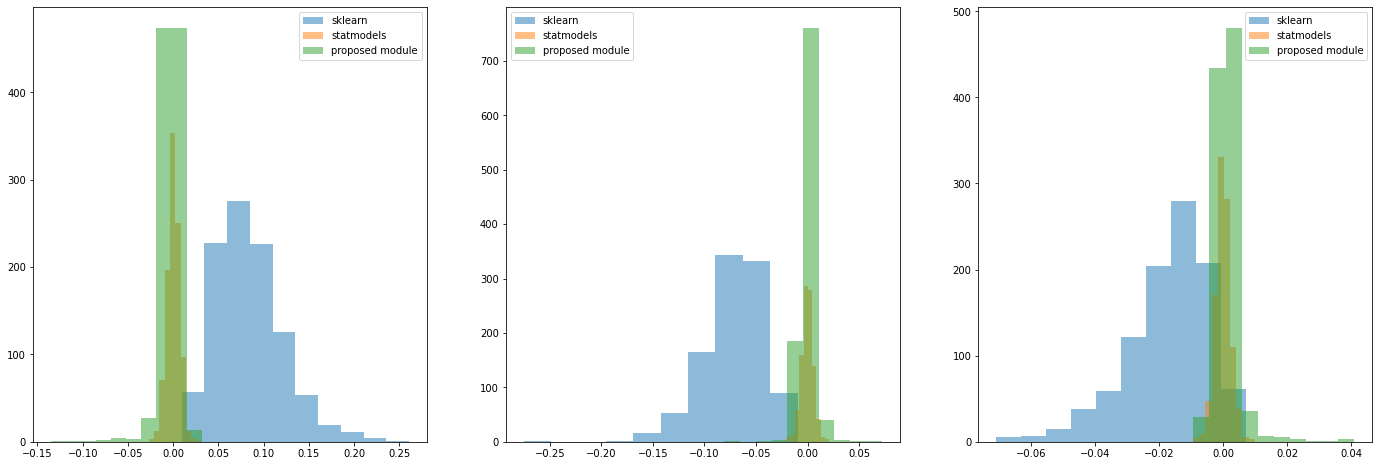

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,8))

ax1.hist(sklearn_b0_error, label="sklearn", alpha = 0.5)
ax1.hist(statsmodels_b0_error, label="statmodels", alpha = 0.5)
ax1.hist(proposed_module_b0_error, label="proposed module", alpha = 0.5)
ax1.legend()

ax2.hist(sklearn_b1_error, label="sklearn", alpha = 0.5)
ax2.hist(statsmodels_b1_error, label="statmodels", alpha = 0.5)
ax2.hist(proposed_module_b1_error, label="proposed module", alpha = 0.5)
ax2.legend()

ax3.hist(sklearn_b2_error, label="sklearn", alpha = 0.5)
ax3.hist(statsmodels_b2_error, label="statmodels", alpha = 0.5)
ax3.hist(proposed_module_b2_error, label="proposed module", alpha = 0.5)
ax3.legend()

plt.show()